In [1]:
import os
import pandas as pd

In [2]:
os.chdir(r"..\\Data")
directory=os.curdir
files=os.listdir(directory)
files=[directory+ '\\' +file for file in files]
data=[]
for file in files:
    print(file)
    content=pd.read_excel(file)
    data.append(content)
merged_data=pd.concat(data)



.\2010_Accidentalidad.xlsx
.\2011_Accidentalidad.xlsx
.\2012_Accidentalidad.xlsx
.\2013_Accidentalidad.xlsx
.\2014_Accidentalidad.xlsx
.\2015_Accidentalidad - copia.xlsx
.\2016_Accidentalidad.xlsx
.\2017_Accidentalidad.xlsx
.\2018_Accidentalidad.xlsx


In [164]:
#Trasnformaciones
df_obj = merged_data.select_dtypes(['object'])
merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2]);

In [5]:
merged_data.dtypes

FECHA                 datetime64[ns]
RANGO HORARIO                 object
DIA SEMANA                    object
DISTRITO                      object
LUGAR ACCIDENTE               object
Nº                            object
Nº PARTE                      object
CPFA Granizo                  object
CPFA Hielo                    object
CPFA Lluvia                   object
CPFA Niebla                   object
CPFA Seco                     object
CPFA Nieve                    object
CPSV Mojada                   object
CPSV Aceite                   object
CPSV Barro                    object
CPSV Grava Suelta             object
CPSV Hielo                    object
CPSV Seca Y Limpia            object
VICTIMAS                       int64
TIPO ACCIDENTE                object
Tipo Vehiculo                 object
TIPO PERSONA                  object
SEXO                          object
LESIVIDAD                     object
Tramo Edad                    object
dtype: object

In [17]:
merged_data['ANO']=merged_data.FECHA.apply(lambda x:x.year)

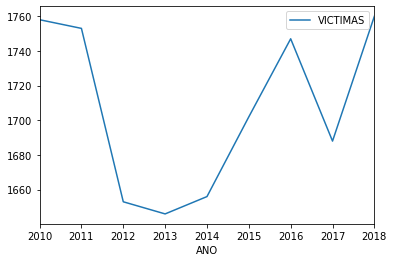

In [163]:


filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['HG','MT','HL']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')

pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum').plot();



In [ ]:
#merged_data[merged_data.LESIVIDAD=='MT'].groupby(by=['ANO','LESIVIDAD'])['VICTIMAS'].sum().plot(kind='bar')
#merged_data[(merged_data['LESIVIDAD'].str.match('MT'))&(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO'))].groupby(by=['ANO'])['VICTIMAS'].sum().plot(kind='bar')
#merged_data[(merged_data['LESIVIDAD'].str.match('MT'))].groupby(by=['ANO'])['VICTIMAS'].sum()
merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO'))].groupby(by=['ANO','LESIVIDAD'])['VICTIMAS'].sum()
#merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2])

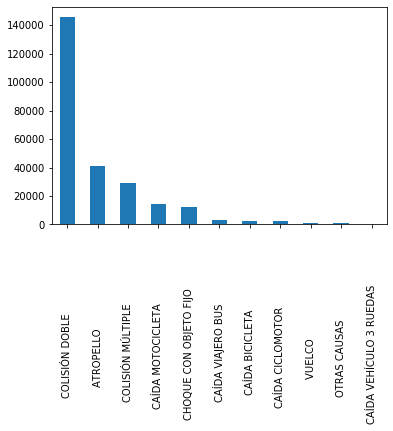

In [66]:
merged_data.LESIVIDAD.value_counts()
merged_data['TIPO ACCIDENTE'].value_counts().plot(kind='bar')